In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify_modify  as  squarify  
from function import *
# Create a data frame with fake data


In [7]:
def draw_treemap(weight_list, label_list):

    df = pd.DataFrame({'weight':weight_list, 'group':label_list })

    # plot it
    
    squarify.plot(sizes=df['weight'], label=df['group'], alpha=.8,rectangle_size=rectangle_size,pad=Gap_size,value=[])
    plt.axis('off')
    plt.show()
    

    


['group A', 'group B', 'group C', 'group D', 'group E', 'group F', 'group G', 'group H', 'group I', 'group J']
[5, 7, 6, 4, 10, 3, 2, 1, 8, 9]


TypeError: 'NoneType' object is not iterable

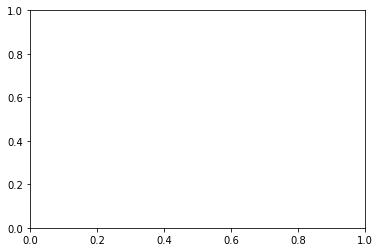

In [9]:


# example : weight_list = [4,3,1,10,2,3,6,1,3,2] 
# example : label_list = ["group A", "group B", "group C", "group D", ... ]
num_weights = 10
max_weight = 10
num_groups = num_weights
label_list = generate_group_list(num_groups)
print(label_list)


# 间隙像素,如果为0则没有间隙
Gap_size=1
# 圆角半径，如果为0则没有圆角
rectangle_size = 2

for i in range(10):
    weight_list = generate_weight_list(num_weights, max_weight)
    print(weight_list)
    draw_treemap(weight_list, label_list)

# weight_list = generate_weight_list(num_weights, max_weight)
# print(weight_list)
# label_list = generate_group_list(num_groups)
# print(label_list)
# draw_treemap(weight_list, label_list)

<ipython-input-3-e238b411ae24>:34: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.imshow(img, extent=im_bbox.bounds, aspect='auto', zorder=-1)


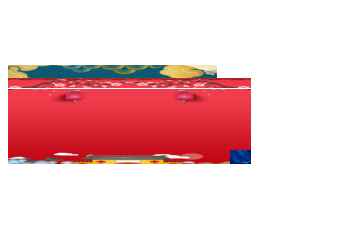

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.transforms as transforms
from PIL import Image
import numpy as np
import squarify

# 模拟数据
sizes = [500, 300, 200, 100]

# 使用 squarify 计算矩形
rects = squarify.normalize_sizes(sizes, 100, 100)
rects = squarify.squarify(rects, 0, 0, 100, 100)

# 示例图片文件名列表
images = [
    'img/1.png',
    'img/2.png',
    'img/3.png',
    'img/4.jpg'
]

fig, ax = plt.subplots()

for idx, rect in enumerate(rects):
    x, y, dx, dy = rect['x'], rect['y'], rect['dx'], rect['dy']
    
    # 读取图片并转换为 NumPy 数组
    img = Image.open(images[idx])
    img = np.array(img)

    # 创建一个可缩放的矩形（Bbox），并将图片显示在矩形内
    im_bbox = transforms.Bbox([[x, y], [x + dx, y + dy]])
    ax.imshow(img, extent=im_bbox.bounds, aspect='auto', zorder=-1)

    # 创建一个表示矩形边界的矩形
    rect_patch = patches.Rectangle((x, y), dx, dy, linewidth=1, edgecolor='white', facecolor='none')
    ax.add_patch(rect_patch)

# 设置坐标轴范围
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
plt.axis('off')
plt.show()


img/1.png
img/2.png
img/3.png
img/4.jpg


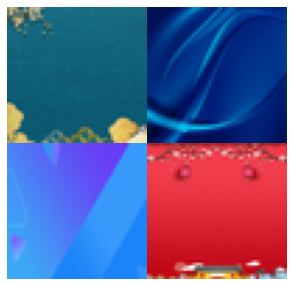

In [10]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from PIL import Image
import numpy as np
import squarify

# 模拟数据
sizes = [500, 500, 500, 500]
labels = ["A", "B", "C", "D"]
colors = ["red", "green", "blue", "yellow"]
images = [
    'img/1.png',
    'img/2.png',
    'img/3.png',
    'img/4.jpg'
]


# 使用 squarify 计算矩形
rects = squarify.normalize_sizes(sizes, 100, 100)
rectangles = squarify.squarify(rects, 0, 0, 100, 100)

# 绘制矩形树图
fig, ax = plt.subplots(figsize=(5, 5))

for i, rect in enumerate(rectangles):
    x, y, dx, dy = rect["x"], rect["y"], rect["dx"], rect["dy"]
    
    # 加载图片
    print(images[i])
    image = Image.open(images[i]) # 确保图片文件名与 labels 对应
    image = image.resize((int(dx), int(dy)), Image.LANCZOS)  # 缩放图片至矩形大小
    image = np.array(image)

    # 创建矩形边界框
    bbox = transforms.Bbox([[x, y], [x + dx, y + dy]])

    # 将图片绘制到矩形中
    # ax.imshow(image, extent=bbox.transformed(ax.transData).get_points().flatten())
    ax.imshow(image, extent=[x, x + dx, y, y + dy], aspect='auto', zorder=-1)
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
    
plt.axis('off')
plt.show()


Axes(0.125,0.11;0.775x0.77)


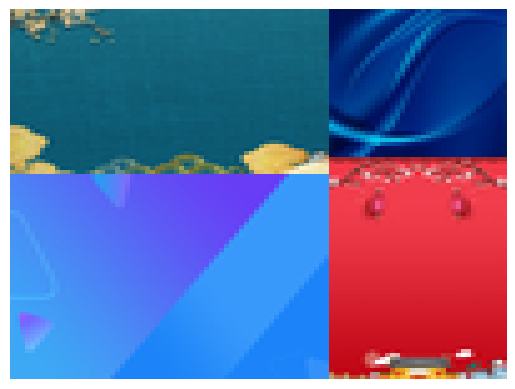

In [14]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from PIL import Image, ImageOps
import numpy as np

def plot_with_images(sizes, image_paths, norm_x=100, norm_y=100, ax=None):
    if ax is None:
        ax = plt.gca()

    normed_sizes = squarify.normalize_sizes(sizes, norm_x, norm_y)
    rects = squarify.squarify(normed_sizes, 0, 0, norm_x, norm_y)

    for i, rect in enumerate(rects):
        x, y, dx, dy = rect["x"], rect["y"], rect["dx"], rect["dy"]
        image = Image.open(image_paths[i]).convert("RGBA")
        image = image.resize((int(dx), int(dy)), Image.LANCZOS)  # 缩放图片至矩形大小
        image_array = np.array(image)

        im = ax.imshow(image_array, extent=[x, x + dx, y, y + dy], aspect='auto', zorder=-1)

    ax.set_xlim(0, norm_x)
    ax.set_ylim(0, norm_y)

    return ax

# 用例
sizes = [500, 400, 300, 200]
# image_paths = [
#     "image1.jpg",
#     "image2.jpg",
#     "image3.jpg",
#     "image4.jpg",
#     "image5.jpg",
# ]
image_paths = [
    'img/1.png',
    'img/2.png',
    'img/3.png',
    'img/4.jpg'
]

fig, ax = plt.subplots()
# print(ax)
plot_with_images(sizes, image_paths, ax=ax)
plt.axis('off')
plt.show()


[1, 5, 3, 1]
['group A', 'group B', 'group C', 'group D']


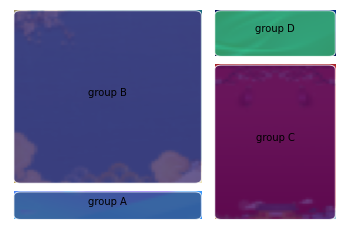

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify_modify  as  squarify  
from function import *
# Create a data frame with fake data



# example : weight_list = [4,3,1,10,2,3,6,1,3,2] 

num_weights = 4
max_weight = 5
weight_list = generate_weight_list(num_weights, max_weight)
print(weight_list)

# example : label_list = ["group A", "group B", "group C", "group D", ... ]
num_groups = num_weights
label_list = generate_group_list(num_groups)
print(label_list)


images_paths = [
    'img\\1.png',
    'img\\2.png',
    'img\\3.png',
    'img\\4.jpg'
]



# 间隙像素,如果为0则没有间隙
Gap_size=2
# 圆角半径，如果为0则没有圆角
rectangle_size = 2

def draw_treemap(weight_list, label_list):

    df = pd.DataFrame({'weight':weight_list, 'group':label_list })

    # plot it
    
    squarify.plot(sizes=df['weight'], label=df['group'], alpha=.8,rectangle_size=rectangle_size,pad=Gap_size,value=[],images_paths=images_paths)
    plt.axis('off')
    plt.show()
    

    
draw_treemap(weight_list, label_list)